<center><font size=4 style="color:#BA4A00"><strong>新闻文本凝聚层次聚类实例</strong></font></center>

Cluster 1:
	This is about machine learning.
	We are learning about clustering algorithms.
	Deep learning is used for image recognition.
	Reinforcement learning is used in gaming.
Cluster 2:
	Natural language processing is a part of AI.
	Computer vision is a popular AI application.
Cluster 3:
	Artificial intelligence is a popular research area.


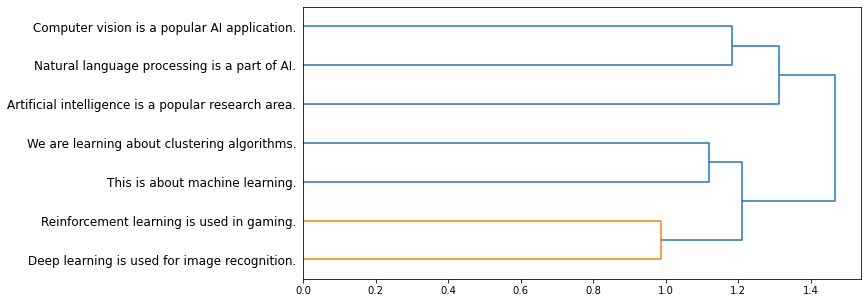

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 创建一个小型文本数据集
documents = [
    "This is about machine learning.",
    "We are learning about clustering algorithms.",
    "Artificial intelligence is a popular research area.",
    "Natural language processing is a part of AI.",
    "Deep learning is used for image recognition.",
    "Computer vision is a popular AI application.",
    "Reinforcement learning is used in gaming."
]

# 将文本转换为TF-IDF向量
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# 使用凝聚层次聚类进行文本聚类
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')
clustering.fit(X.toarray())

# 打印聚类结果
for i in range(n_clusters):
    print(f"Cluster {i + 1}:")
    for j, label in enumerate(clustering.labels_):
        if label == i:
            print(f"\t{documents[j]}")

# 计算距离矩阵
dist_matrix = 1 - cosine_similarity(X)

# 计算关联矩阵（Z）
Z = linkage(dist_matrix, method='average')

# 可视化树状图
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=documents, orientation='right')
plt.show()
